#### Perceptron

The idea of a Perceptron is analogous to the operating principle of the basic processing unit of the brain — Neuron. A Neuron is comprised of many input signals carried by Dendrites, the cell body and one output signal carried along Axon. The Neuron fires an action signal when the cell meets a particular threshold.

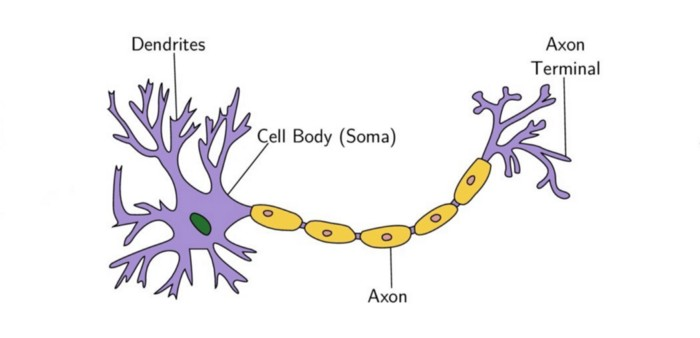

Similarly, the perceptron has many inputs(often called features) that are fed into a Linear unit that produces one binary output. Therefore, perceptrons can be applied in solving Binary Classification problems where the sample is to be identified as belonging to one of the predefined two classes.

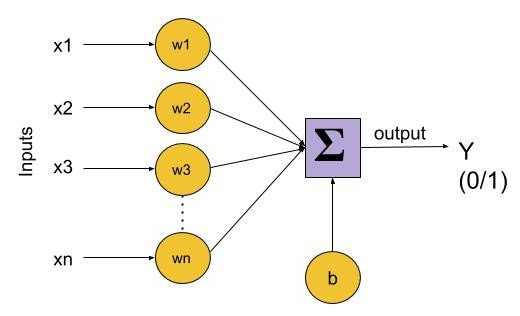

Since Perceptrons are Binary Classifiers (0/1), we can define their computation as follows:

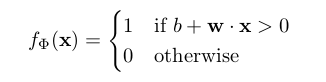

The function **f(x)=b+w.x** is a linear combination of weight and feature vectors. Perceptron is, therefore, a linear classifier — an algorithm that predicts using a linear predictor function.

The weights signify the effectiveness of each feature `xᵢ`  in `x`  on the model’s behavior. Higher the weight **wᵢ** of a feature **xᵢ**, higher is it’s influence on the output. On the other hand, the bias **b** is like the intercept in the linear equation. It’s a constant that helps the model adjust in a way that best fits the data. 

##### The model can be trained using the following algorithm

1. set b = w = 0
2. for N iterations, or until weights do not change
       (a) for each training example xᵏ with label yᵏ
           i. if yᵏ — f(xᵏ) = 0, continue
           ii. else, update wᵢ, △wᵢ = (yᵏ — f(xᵏ)) xᵢ

#### Implementation

The dataset that we consider for implementing Perceptron is the Iris  dataset. This dataset contains 4 features that describe the flower and classify them as belonging to one of the `3 classes`. 

We strip the last 50 rows of the dataset that belongs to the class ‘Iris-virginica’ and use only 2 classes.`Iris-setosa` and `Iris-versicolor` because these classes are linearly separable and the algorithm converges to a local minimum by eventually finding the optimal weights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)  
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data

data = load_data()

In [2]:
data[[0,1,2,98,99],]

matrix([[5.1, 3.5, 1.4, 0.2, 0. ],
        [4.9, 3. , 1.4, 0.2, 0. ],
        [4.7, 3.2, 1.3, 0.2, 0. ],
        [5.1, 2.5, 3. , 1.1, 1. ],
        [5.7, 2.8, 4.1, 1.3, 1. ]])

#### Visualizing the dataset

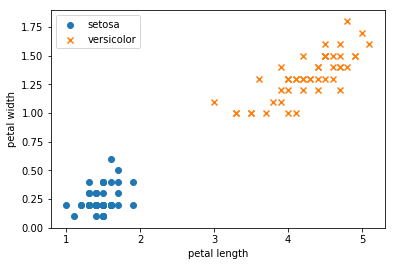

In [3]:
plt.scatter(np.array(data[:50,2]), np.array(data[:50,3]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,2]), np.array(data[50:,3]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

We have 4 features and hence 4 weights associated with each feature. Remember that we defined a bias term w₀ that assumes x₀=1 making it a total of 5 weights.

We have defined the number of iterations to be 10. This is one of the hyperparameters, as opposed to system parameters like w that are learned by the algorithm. At each iteration, the algorithm computes the class (0 or 1) for all the data points and updates the weights with each misclassification.

If the sample is misclassified, then the weights are updated by delta that shifts in the opposite direction. So if the sample is to be classified again, the result is “less wrong”. We classify any label≤0 as ‘0’ (Iris-setosa) anything else to be a ‘1’ (Iris-versicolor).

In [4]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

Now, let’s plot the number of misclassified samples in each iteration.

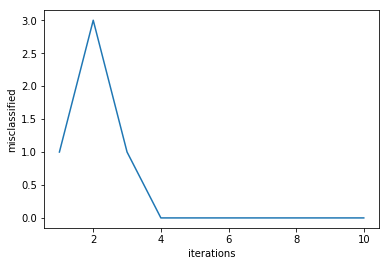

In [5]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

We can see that the algorithm converges in the 4th iteration. i.e., all the samples are classified correctly at the 4th pass through the data.

#### Limitations
A single-layer perceptron works only if the dataset is linearly separable.

The algorithm is used only for Binary Classification problems. However, we can extend the algorithm to solve a multiclass classification problem by introducing one perceptron per class. i.e., each perceptron results in a 0 or 1 signifying whether or not the sample belongs to that class.

#### Neural Network

The process of creating a neural network begins with the perceptron. In simple terms, the `perceptron` receives inputs, multiplies them by some weights, and then passes them into an activation function (such as `logistic`, `relu`, `tanh`, `identity`) to produce an output. 

Neural networks are created by `adding the layers of these perceptrons` together, known as a `multi-layer perceptron` model. 

There are `three layers` of a neural network - the `input`, `hidden`, and `output` layers. 
1. The input layer directly receives the data 
2. The output layer creates the required output. 
3. The layers in between are known as hidden layers where the intermediate computation takes place. 

Neurons are arranged into networks of neurons.

A row of neurons is called a layer and one network can have multiple layers. The architecture of the neurons in the network is often called the network topology.

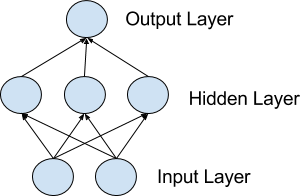

A neural network algorithm can be used for both classification and regression problems

##### A neural network executes in two phases: Feed-Forward and Back Propagation.

###### Feed-Forward Phase

1. The values received in the input layer are multiplied with the weights. A bias is added to the summation of the inputs and weights in order to avoid null values.


2. Each neuron in the first hidden layer receives different values from the input layer depending upon the weights and bias. Neurons have an activation function that operates upon the value received from the input layer. The activation function can be of many types, like a step function, sigmoid function, relu function, or tanh function. As a rule of thumb, relu function is used in the hidden layer neurons and sigmoid function is used for the output layer neuron.


3. The outputs from the first hidden layer neurons are multiplied with the weights of the second hidden layer; the results are summed together and passed to the neurons of the proceeding layers. This process continues until the outer layer is reached. The values calculated at the outer layer are the actual outputs of the algorithm.


The feed-forward phase consists of these three steps. However, the predicted output is not necessarily correct right away; it can be wrong, and we need to correct it. The purpose of a learning algorithm is to make predictions that are as accurate as possible. To improve these predicted results, a neural network will then go through a back propagation phase. During back propagation, the weights of different neurons are updated in a way that the difference between the desired and predicted output is as small as possible.

#### Back Propagation Phase

1. The error is calculated by quantifying the difference between the predicted output and the desired output. This difference is called "loss" and the function used to calculate the difference is called the "loss function". Loss functions can be of different types e.g. mean squared error or cross entropy functions. 


2. Once the error is calculated, the next step is to minimize that error. To do so, partial derivative of the error function is calculated with respect to all the weights and biases. This is called `gradient decent`. The derivatives can be used to find the slope of the error function. If the slop is positive, the value of the weights can be reduced or if the slop is negative the value of weight can be increased. This reduces the overall error. The function that is used to reduce this error is called the optimization function.


This one cycle of feed-forward and back propagation is called one "epoch". This process continues until a reasonable accuracy is achieved. 

There is no standard for reasonable accuracy, ideally you'd strive for 100% accuracy, but this is extremely difficult to achieve for any non-trivial dataset. In many cases 90%+ accuracy is considered acceptable, but it really depends on your use-case(data).

#### Implementing with Scikit-Learn

In [1]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

In [2]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Preprocessing

In [12]:
# Assign data from first four columns to X variable (feature vector)
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable (label vector)
y = irisdata.select_dtypes(include=[object])


In [13]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [15]:
y.Class.unique()

array([0, 1, 2])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [24]:
predictions = mlp.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]


#### Challange-1

Design a Multilayer Perceptron to classify to predict whether the passenger is going to survive or not form the given passenger dataset.